In [40]:
# Chapter 13
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as scp
import math

In [2]:
data = pd.read_csv('data/car.txt', delim_whitespace = True)
data

,MAKE,VOL,HP,MPG,SP,WT
0,GM/GeoMetroXF1,89,49,65.4,96,17.5
1,GM/GeoMetro,92,55,56.0,97,20.0
2,GM/GeoMetroLSI,92,55,55.9,97,20.0
3,SuzukiSwift,92,70,49.0,105,20.0
4,DaihatsuCharade,92,53,46.5,96,20.0
...,...,...,...,...,...,...
77,Mercedes500SL,50,322,18.1,165,45.0
78,Mercedes560SEL,115,238,17.2,140,45.0
79,JaguarXJSConvert,50,263,17.0,147,45.0
80,BMW750IL,119,295,16.7,157,45.0


In [15]:
xs = data["HP"].to_numpy()
ys = data["MPG"].to_numpy()
xBar = xs.mean()
yBar = ys.mean()

In [23]:
yBar

33.78170731707316

In [25]:
b1 = np.sum((xs-xBar)*(ys-yBar))/(xs.std()**2)/xs.size

In [26]:
b0 = yBar - b1*xBar

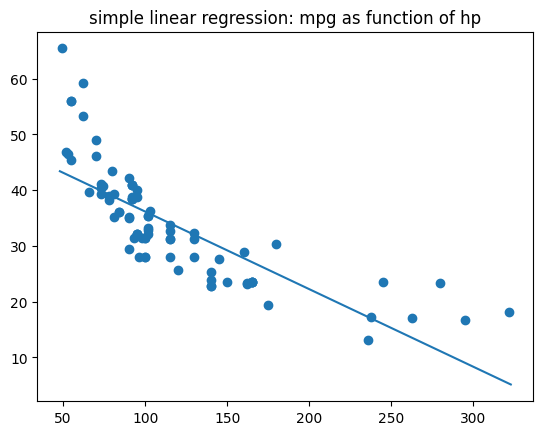

In [28]:
xVec = np.linspace(xs.min()-1, xs.max()+1, 1000)
plt.scatter(xs, ys)
plt.plot(xVec, b1*xVec+b0)
plt.title('simple linear regression: mpg as function of hp')
plt.show()

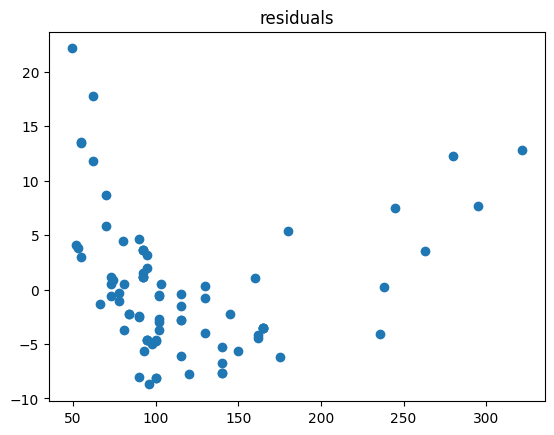

In [30]:
residuals = ys-b1*xs-b0
plt.scatter(xs, residuals)
plt.title("residuals")
plt.show()
#not normal distribution around 0

In [32]:
yLog = np.log(ys)
yLogBar = yLog.mean()

In [33]:
c1 = np.sum((xs-xBar)*(yLog-yLogBar))/(xs.std()**2)/xs.size
c0 = yLogBar-c1*xBar

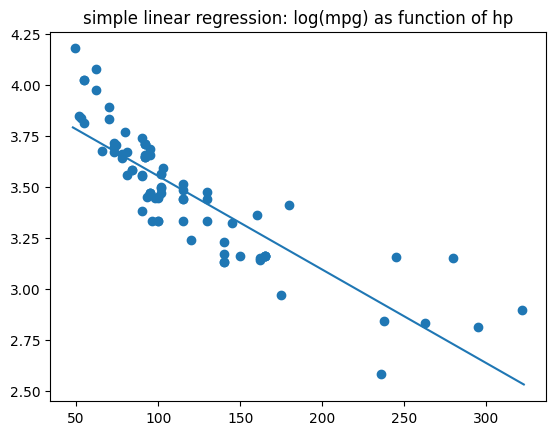

In [34]:
plt.scatter(xs, yLog)
plt.plot(xVec, c1*xVec+c0)
plt.title('simple linear regression: log(mpg) as function of hp')
plt.show()

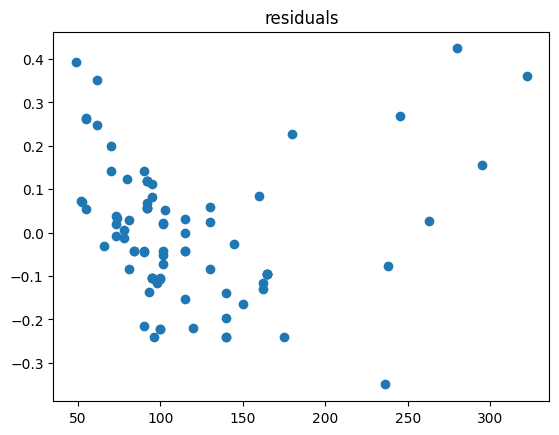

In [35]:
residuals2 = yLog-c1*xs-c0
plt.scatter(xs, residuals2)
plt.title("residuals")
plt.show()
#normal distribution around 0

In [98]:
#multiple linear regression

In [16]:
data = pd.read_csv('data/car.txt', delim_whitespace = True)
data

,MAKE,VOL,HP,MPG,SP,WT
0,GM/GeoMetroXF1,89,49,65.4,96,17.5
1,GM/GeoMetro,92,55,56.0,97,20.0
2,GM/GeoMetroLSI,92,55,55.9,97,20.0
3,SuzukiSwift,92,70,49.0,105,20.0
4,DaihatsuCharade,92,53,46.5,96,20.0
...,...,...,...,...,...,...
77,Mercedes500SL,50,322,18.1,165,45.0
78,Mercedes560SEL,115,238,17.2,140,45.0
79,JaguarXJSConvert,50,263,17.0,147,45.0
80,BMW750IL,119,295,16.7,157,45.0


In [27]:
n = 82
labels = [ "HP", "VOL","SP", "WT"]
k = len(labels)
X = np.empty(shape=(n, k), dtype=np.float64)
#X[:, 0] = np.ones(n)
#X[:, 1:k] = data[labels].to_numpy()
X = data[labels].to_numpy()
Y = data["MPG"].to_numpy()


In [45]:
#full model
#print(f'{"Name":>6} | {"Parameter":>10} | {"std err.":>10} | {"t-value":>10} | {"p-value":>10}')
#print(f'{"---------------------------------------------------------------"}')
beta, sig, seMatrix, trainingErr = multiLinearFit(X, Y)
print(labels)
print(beta)
print(sig**2)
print([seMatrix[i, i]**0.5 for i in range(k)])
W = [np.abs(beta[i])/seMatrix[i, i]**0.5 for i in range(k)]

['HP', 'VOL', 'SP', 'WT']
[-0.26116655 -0.03522484  0.69908764 -0.34904552]
24.61149236058521
[0.021239277840082296, 0.030829173743440862, 0.0293419030073753, 0.1449831774575112]


In [ ]:
#Zheng-Loh model selection method

In [48]:
frRank = []
for val in sorted(W)[::-1]:
    frRank.append(W.index(val))
frRank = np.array(frRank)
jHat = -1
model = []
inf = 1e9
bestScore = inf
summary = []
for j in range(k):
    model.append(j)
    matrix = X[:, frRank[model]]
    beta, sig, seMatrix, trainingErr = multiLinearFit(matrix, Y)
    score = trainingErr + j*sig**2*np.log(n)
    summary.append(score)
    if score < bestScore:
        bestScore = score
        jHat = j
print(summary)
print(frRank)
print(jHat)

[14104.349682940509, 2539.199249339058, 2169.577193838717, 2245.06421539351]
[2 0 3 1]
2


In [4]:
def trainingError(Y, Yhat):
    return np.sum((Y-Yhat)**2)

def multiLinearFit(X, Y):
    n, k = X.shape
    beta = None
    try:
        beta = np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(Y)
    except:
        print(X)
    Yhat = X.dot(beta)
    trainingErr = np.sum((Y-Yhat)**2)
    sig = (trainingErr/(n-k))**0.5
    seMatrix = sig**2*np.linalg.inv(X.transpose().dot(X))
    return beta, sig, seMatrix, trainingErr
    
def Mallow(X, sig, trainingErr):
    return trainingErr + 2*sig**2*X.shape[1]
    

In [ ]:
#forward stepwise

In [31]:
model = []
matrix = []
inf = 1e9
bestMallow = inf
for i in range(k):
    bestCov = -1 
    summary =  []
    for j in range(0, k):
        if j in model:continue
        temp = matrix.copy()
        temp.append(X[:, j])
        temp = np.array(temp, dtype=np.float64).transpose()
        beta, sig, seMatrix, trainingErr = multiLinearFit(temp, Y)
        score = Mallow(temp, sig, trainingErr)
        summary.append([j, sig**2, score])
        if score < bestMallow:
            bestMallow = score
            bestCov = j
    print(summary)
    if bestCov == -1: break
    model.append(bestCov)
    matrix.append(X[:, bestCov])
beta, sig, seMatrix, trainingErr = multiLinearFit(np.array(matrix).transpose(), Y)
print(model)
print(beta, sig, seMatrix, trainingErr)

[[0, 516.5157990484629, 42870.81132102242], [1, 207.41546942041032, 17215.483961894053], [2, 174.12777386346306, 14452.605230667436], [3, 319.692985732162, 26534.517815769446]]
[[0, 30.082904204588626, 2526.963953185445], [1, 171.34091974318272, 14392.63725842735], [3, 99.97140145873607, 8397.59772253383]]
[[1, 26.105630240900577, 2218.978570476549], [3, 24.706664845767307, 2100.066511890221]]
[[1, 24.61149236058521, 2116.588343010328]]
[2, 0, 3]
[ 0.68166193 -0.24471468 -0.46063309] 4.970579930527957 [[ 6.30778953e-04 -5.76597195e-06 -2.17135643e-03]
 [-5.76597195e-06  2.44722702e-04 -9.38904392e-04]
 [-2.17135643e-03 -9.38904392e-04  1.15265246e-02]] 1951.8265228156174


In [35]:
a = [1, 3, 2]
a.remove(1)
a

[3, 2]

In [48]:
#backward stepwise

In [38]:
model = [i for i in range(k)]
matrix = data[labels].to_numpy()
beta, sig, seMatrix, trainingErr = multiLinearFit(matrix, Y)
bestMallow = Mallow(matrix, sig, trainingErr)

for i in range(k):
    bestCov = -1 
    summary =  []
    model.sort()
    for j in range(k):
        if not j in model:continue
        model.remove(j)
        temp = matrix[:, model]        
        beta, sig, seMatrix, trainingErr = multiLinearFit(temp, Y)
        score = Mallow(temp, sig, trainingErr)
        summary.append([j, score])
        if score < bestMallow:
            bestMallow = score
            bestCov = j
        model.append(j)
    print(summary)
    if bestCov == -1: break
    model.remove(bestCov)
beta, sig, seMatrix, trainingErr = multiLinearFit(matrix[:, model], Y)
print(model)
print(beta, sig, seMatrix, trainingErr)

[[0, 6069.416021764643], [1, 2100.066511890224], [2, 17097.485974873332], [3, 2218.978570476549]]
[[0, 8397.59772253383], [2, 21159.57747341678], [3, 2526.9639531854446]]
[0, 2, 3]
[-0.24471468  0.68166193 -0.46063309] 4.9705799305279585 [[ 2.44722702e-04 -5.76597195e-06 -9.38904392e-04]
 [-5.76597195e-06  6.30778953e-04 -2.17135643e-03]
 [-9.38904392e-04 -2.17135643e-03  1.15265246e-02]] 1951.826522815619


In [2]:
#11

In [41]:
data = pd.read_csv('data/coris.txt', delimiter=",")
n = 462
k = 10
for i in range(n):
    data.loc[i, "inter"] = 1
data

,inter,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,1,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,1,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,1,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...,...
457,1,214,0.40,5.98,31.72,0,64,28.45,0.00,58,0
458,1,182,4.20,4.41,32.10,0,52,28.61,18.72,52,1
459,1,108,3.00,1.59,15.23,0,40,20.09,26.64,55,0
460,1,118,5.40,11.61,30.79,0,64,27.35,23.97,40,0


In [42]:
labels = data.columns.to_numpy()[:-1]
X = data[labels].to_numpy(dtype=np.float64)
Y = data["chd"].to_numpy(dtype=np.float64)
print(X, Y)

[[1.000e+00 1.600e+02 1.200e+01 ... 2.530e+01 9.720e+01 5.200e+01]
 [1.000e+00 1.440e+02 1.000e-02 ... 2.887e+01 2.060e+00 6.300e+01]
 [1.000e+00 1.180e+02 8.000e-02 ... 2.914e+01 3.810e+00 4.600e+01]
 ...
 [1.000e+00 1.080e+02 3.000e+00 ... 2.009e+01 2.664e+01 5.500e+01]
 [1.000e+00 1.180e+02 5.400e+00 ... 2.735e+01 2.397e+01 4.000e+01]
 [1.000e+00 1.320e+02 0.000e+00 ... 1.470e+01 0.000e+00 4.600e+01]] [1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0.
 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 0

In [43]:
def multiLinearFit(X, W, Y):
    n, k = X.shape
    beta = None
    try:
        beta = np.linalg.inv(X.transpose().dot(W).dot(X)).dot(X.transpose()).dot(W).dot(Y)
    except:
        print(X)
    Yhat = X.dot(beta)
    trainingErr = np.sum((Y-Yhat)**2)
    sig = (trainingErr/(n-k))**0.5
    seMatrix = sig**2*np.linalg.inv(X.transpose().dot(X))
    return beta, sig, seMatrix, trainingErr

def logisticFit(X, Y, err=0.01, maxIter=1000):
    n, k = X.shape
    beta = np.zeros(shape=k)
    
    def logit(x):
        return np.log(x/1-x)
    def logitInv(x):
        return 1/(np.exp(-x)+1)
    
    Z = np.zeros(shape=n)
    p = np.zeros(shape=n)
    seMatrix = np.zeros(shape=(k, k))
    for _ in range(maxIter):
        for i in range(n):
            p[i] = logitInv(beta.dot(X[i]))
            Z[i] = beta.dot(X[i]) + (Y[i]-p[i])/(p[i]*(1-p[i]))
        W = np.diag([float(p[i])*(1-p[i]) for i in range(n)])
        #print(W)
        beta, sig, seMatrix, trainingErr = multiLinearFit(X, W, Z)
    
    Zhat = X.dot(beta)
    phat = logitInv(Zhat)
    
    trainingErrRate = np.mean(np.array([(phat[i]<0.5 and Y[i]==1) or (phat[i]>0.5 and Y[i]==0) for i in range(n)]))       
    return beta, seMatrix, trainingErrRate

In [46]:
def evalAic(X, Y, beta):
    n, k = X.shape
    
    def logit(x):
        return np.log(x/1-x)
    def logitInv(x):
        return 1/(np.exp(-x)+1)
    
    Zhat = X.dot(beta)
    phat = logitInv(Zhat)
    
    res = np.sum(Y*np.log(phat) + (1-Y)*np.log(1-phat)) - k
    return res

In [45]:
beta, seMatrix, trainingErrRate = logisticFit(X, Y)
print(beta, [seMatrix[j, j]**0.5 for j in range(k)], trainingErrRate)
print(evalAic(X, Y, beta))

[-6.15072086e+00  6.50401713e-03  7.93764457e-02  1.73923898e-01
  1.85865682e-02  9.25370419e-01  3.95950250e-02 -6.29098693e-02
  1.21662401e-04  4.52253496e-02] [1.3433875442296317, 0.006947545339186011, 0.03191814756890948, 0.07009223346989833, 0.0313179004895241, 0.27101642860015357, 0.013374943482654238, 0.04616998616288192, 0.005439492903561718, 0.013045642556208107] 0.2662337662337662
-246.07001618624892


In [52]:
model = [i for i in range(k)]
matrix = X.copy()
beta, seMatrix, trainingErrRate = logisticFit(matrix, Y, maxIter=20)
bestAic = evalAic(matrix, Y, beta)
score = [0]*k

for i in range(k):
    bestCov = -1 
    #summary =  []
    for j in range(k):
        if not j in model:continue
        model.remove(j)
        temp = matrix[:, model]        
        beta, seMatrix, trainingErrRate = logisticFit(temp, Y, maxIter=20)
        Aic = evalAic(temp, Y, beta)
        #summary.append([j, Aic])
        score[j] = Aic
        if Aic > bestAic:
            bestAic = Aic
            bestCov = j
        model.append(j)
        model.sort()
    print("AIC table: ")
    for j in model: 
        print(f'{labels[j]:>9} | ', end = "")
    print()
    for j in model:  
        print(f'{float(score[j]):9.2f} | ', end = "")
    print()
    #print(summary)
    if bestCov == -1: break
    model.remove(bestCov)
beta, seMatrix, trainingErrRate = logisticFit(matrix[:, model], Y, maxIter=20)
print("Final model: ")
for j in model: 
    print(f'{labels[j]:>9} | ', end = "")
print()
for j in range(len(model)):  
    print(f'{float(beta[j]):9.3f} | ', end = "")


AIC table: 
    inter |       sbp |   tobacco |       ldl | adiposity |   famhist |     typea |   obesity |   alcohol |       age | 
  -257.03 |   -245.72 |   -249.84 |   -249.54 |   -245.27 |   -253.44 |   -250.52 |   -246.12 |   -245.07 |   -252.26 | 
AIC table: 
    inter |       sbp |   tobacco |       ldl | adiposity |   famhist |     typea |   obesity |       age | 
  -256.03 |   -244.73 |   -249.03 |   -248.58 |   -244.27 |   -252.50 |   -249.53 |   -245.12 |   -251.32 | 
AIC table: 
    inter |       sbp |   tobacco |       ldl |   famhist |     typea |   obesity |       age | 
  -258.09 |   -243.99 |   -248.27 |   -248.47 |   -251.69 |   -248.60 |   -244.33 |   -254.74 | 
AIC table: 
    inter |   tobacco |       ldl |   famhist |     typea |   obesity |       age | 
  -258.78 |   -248.09 |   -248.27 |   -251.29 |   -248.15 |   -243.84 |   -257.06 | 
AIC table: 
    inter |   tobacco |       ldl |   famhist |     typea |       age | 
  -274.34 |   -248.02 |   -247.36 |   -251.